<a href="https://colab.research.google.com/github/Pria30-gif/FF/blob/main/CARPRICEPREDICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -q kaggle scikit-learn pandas matplotlib seaborn xgboost joblib


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


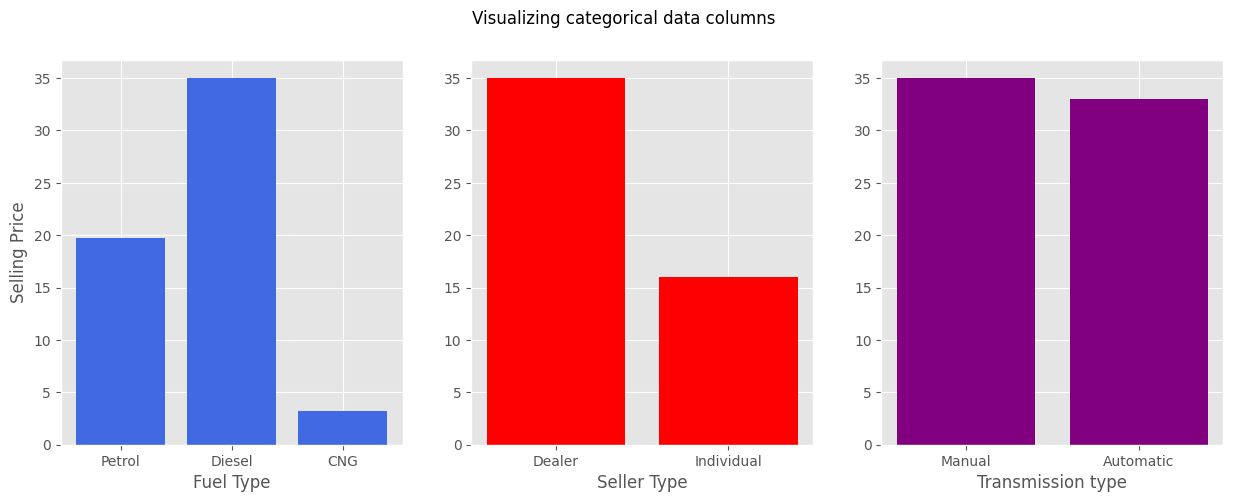

/tmp/ipython-input-3540939398.py:59: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)


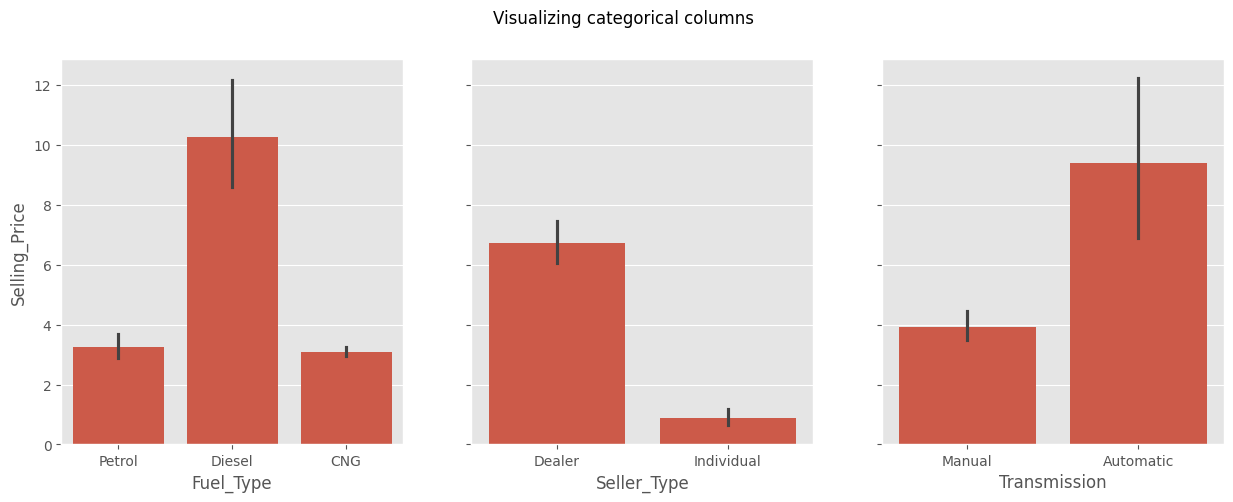

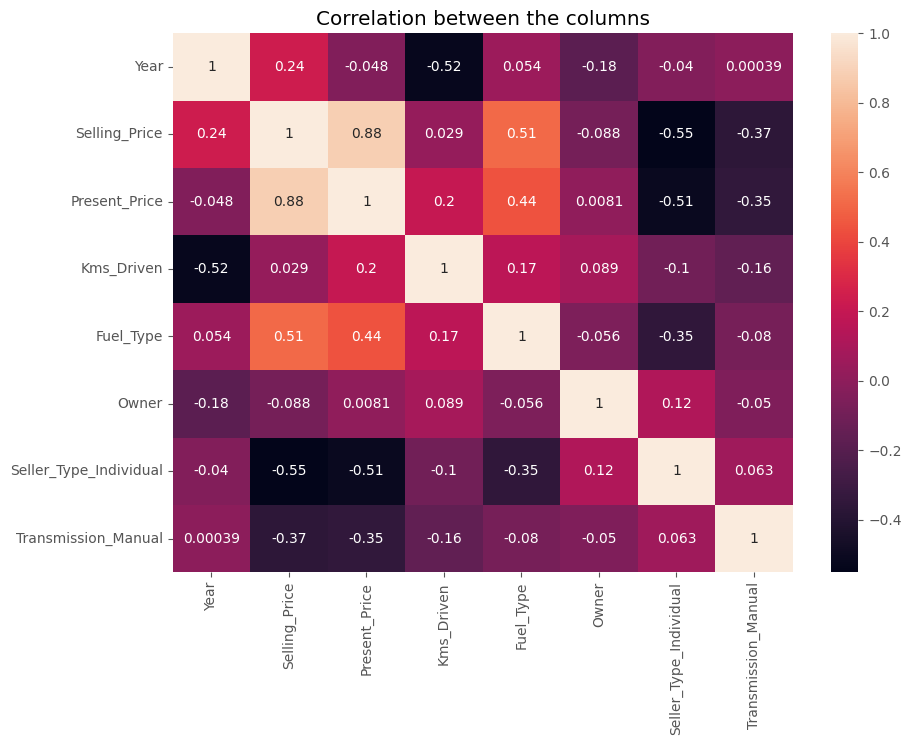

Shape of X is:  (301, 7)
Shape of y is:  (301,)
X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,)
MAE:  1.258140470647337
MSE:  3.493286026225147
R2 score:  0.8294933369778817


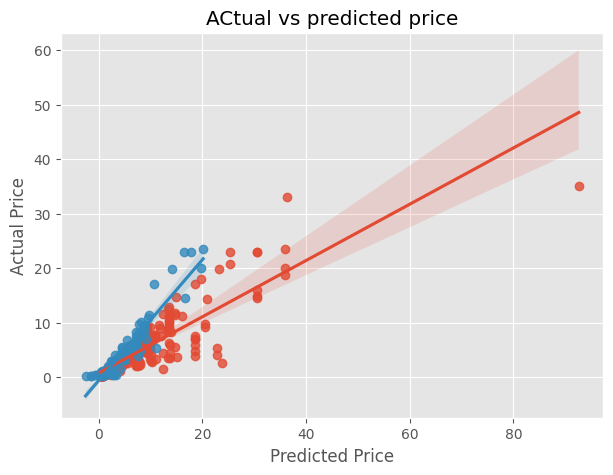

In [6]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

car_data = pd.read_csv('car data.csv')

car_data.head()

car_data.info()

car_data.isnull().sum()

car_data.describe()
car_data.columns
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

seller_data = car_data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

#manual encoding
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
#one hot encoding
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

plt.figure(figsize=(10,7))
sns.heatmap(car_data.drop('Car_Name', axis=1).corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)

X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

# Task
Explore other regression models, train and evaluate them, compare their performance, and potentially tune the best model to improve the machine learning project.

## Explore other models

### Subtask:
Choose a few other regression models from scikit-learn to compare with Linear Regression.


**Reasoning**:
Select and import Decision Tree Regressor and Random Forest Regressor from scikit-learn to compare with Linear Regression.



In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Train and evaluate models

### Subtask:
Train the selected models using your training data and evaluate their performance using appropriate metrics like MAE, MSE, and R2 score on the test data.


**Reasoning**:
Train and evaluate the Decision Tree and Random Forest models.



In [8]:
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("Decision Tree Regressor Performance:")
print("MAE:", metrics.mean_absolute_error(dt_pred, y_test))
print("MSE:", metrics.mean_squared_error(dt_pred, y_test))
print("R2 score:", metrics.r2_score(dt_pred, y_test))

print("\nRandom Forest Regressor Performance:")
print("MAE:", metrics.mean_absolute_error(rf_pred, y_test))
print("MSE:", metrics.mean_squared_error(rf_pred, y_test))
print("R2 score:", metrics.r2_score(rf_pred, y_test))

Decision Tree Regressor Performance:
MAE: 0.5964835164835164
MSE: 0.8815384615384614
R2 score: 0.9646816815902893

Random Forest Regressor Performance:
MAE: 0.6277032967032968
MSE: 1.052924072967034
R2 score: 0.9577453709121841


## Compare model performance

### Subtask:
Visualize or tabulate the performance metrics of all the models to identify the best-performing one.


**Reasoning**:
Create a DataFrame to store the performance metrics for each model and then print it to compare the models.



In [9]:
metrics_data = {'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],
                'MAE': [metrics.mean_absolute_error(pred, y_test), metrics.mean_absolute_error(dt_pred, y_test), metrics.mean_absolute_error(rf_pred, y_test)],
                'MSE': [metrics.mean_squared_error(pred, y_test), metrics.mean_squared_error(dt_pred, y_test), metrics.mean_squared_error(rf_pred, y_test)],
                'R2 Score': [metrics.r2_score(pred, y_test), metrics.r2_score(dt_pred, y_test), metrics.r2_score(rf_pred, y_test)]}

performance_df = pd.DataFrame(metrics_data)

display(performance_df)

,Model,MAE,MSE,R2 Score
0,Linear Regression,1.258140,3.493286,0.829493
1,Decision Tree Regressor,0.596484,0.881538,0.964682
2,Random Forest Regressor,0.627703,1.052924,0.957745


**Reasoning**:
Create a bar plot to visualize the performance metrics for each model and display the plots.



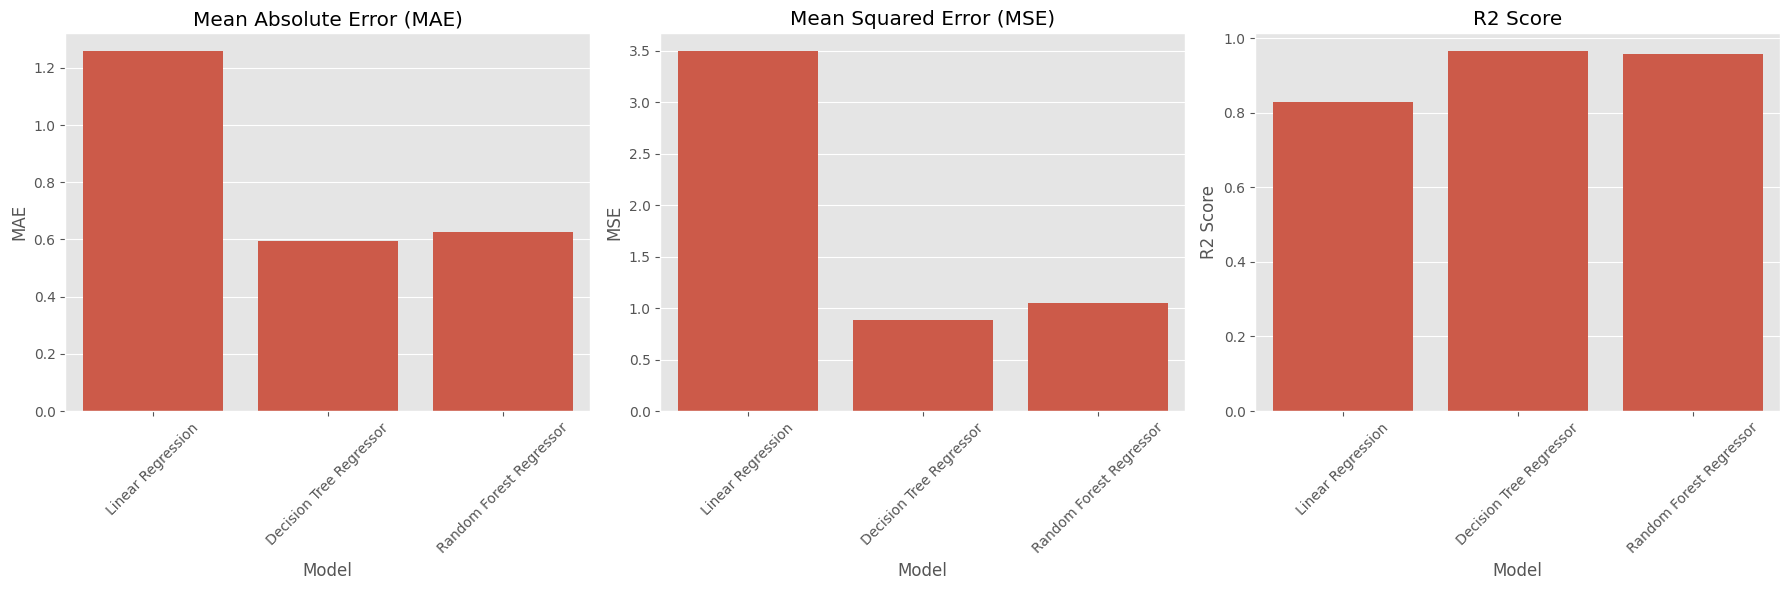

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Model', y='MAE', data=performance_df, ax=axes[0])
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].set_xlabel('Model')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='MSE', data=performance_df, ax=axes[1])
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylabel('MSE')
axes[1].set_xlabel('Model')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='R2 Score', data=performance_df, ax=axes[2])
axes[2].set_title('R2 Score')
axes[2].set_ylabel('R2 Score')
axes[2].set_xlabel('Model')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Model tuning

### Subtask:
If time permits, you can try tuning the hyperparameters of the best-performing model to potentially improve its performance further.


**Reasoning**:
Import GridSearchCV and DecisionTreeRegressor, define the hyperparameter grid, instantiate GridSearchCV, and fit it to the training data.



In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

**Reasoning**:
Get the best hyperparameters from the fitted GridSearchCV, train a new Decision Tree Regressor model with these hyperparameters, evaluate the tuned model on the test data, and print the best hyperparameters and evaluation metrics.



In [12]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

tuned_dt_model = DecisionTreeRegressor(**best_params, random_state=42)
tuned_dt_model.fit(X_train, y_train)
tuned_dt_pred = tuned_dt_model.predict(X_test)

print("\nTuned Decision Tree Regressor Performance:")
print("MAE:", metrics.mean_absolute_error(tuned_dt_pred, y_test))
print("MSE:", metrics.mean_squared_error(tuned_dt_pred, y_test))
print("R2 score:", metrics.r2_score(tuned_dt_pred, y_test))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Tuned Decision Tree Regressor Performance:
MAE: 0.78310989010989
MSE: 2.2358020072263334
R2 score: 0.9248851591800371


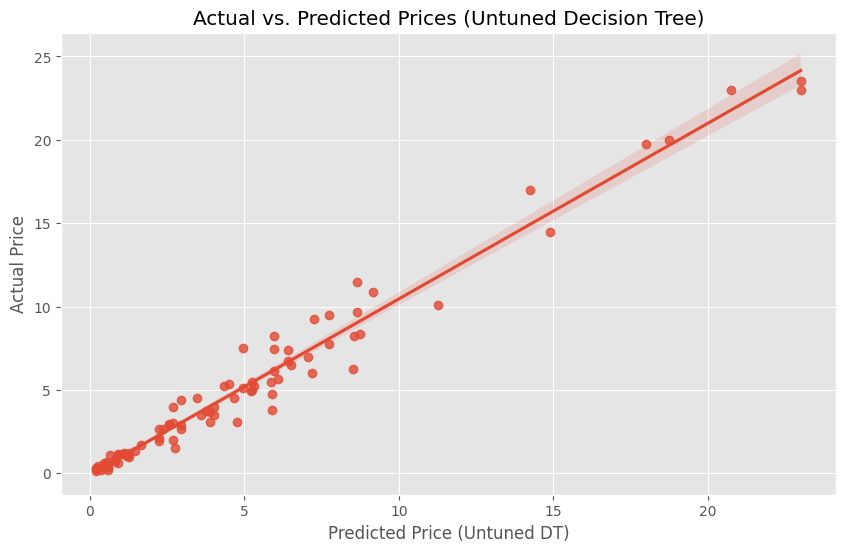

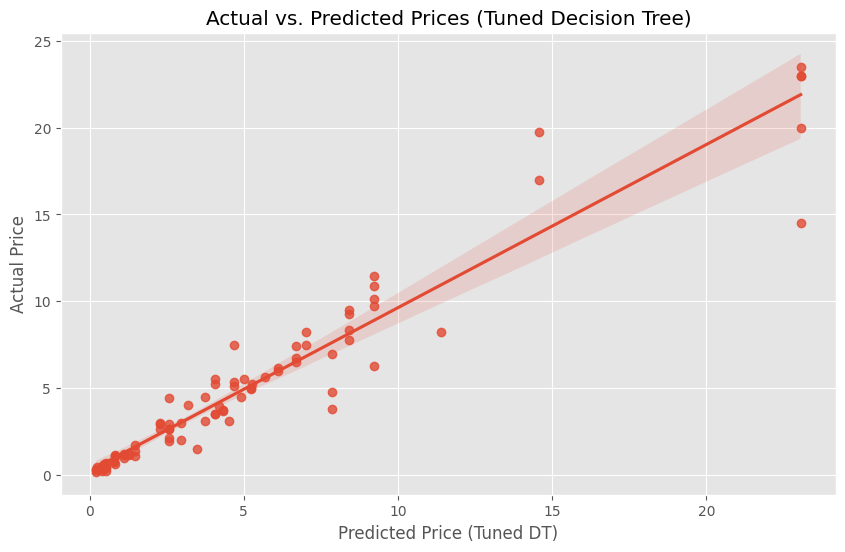

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize actual vs. predicted prices for the untuned Decision Tree model
plt.figure(figsize=(10, 6))
sns.regplot(x=dt_pred, y=y_test)
plt.xlabel("Predicted Price (Untuned DT)")
plt.ylabel("Actual Price")
plt.title("Actual vs. Predicted Prices (Untuned Decision Tree)")
plt.show()

# Visualize actual vs. predicted prices for the tuned Decision Tree model
plt.figure(figsize=(10, 6))
sns.regplot(x=tuned_dt_pred, y=y_test)
plt.xlabel("Predicted Price (Tuned DT)")
plt.ylabel("Actual Price")
plt.title("Actual vs. Predicted Prices (Tuned Decision Tree)")
plt.show()

In [14]:
import pandas as pd

# Get the cross-validation results from the grid search
cv_results = grid_search.cv_results_

# Create a DataFrame to display the results
cv_results_df = pd.DataFrame(cv_results)

# Select relevant columns for display
display(cv_results_df[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score'))

,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score,rank_test_score
6,None,2,4,0.863099,1
7,None,5,4,0.863099,1
15,10,2,4,0.863099,1
16,10,5,4,0.863099,1
24,20,2,4,0.863099,1
25,20,5,4,0.863099,1
34,30,5,4,0.863099,1
33,30,2,4,0.863099,1
23,20,10,2,0.856031,9
32,30,10,2,0.856031,9
